In [1]:
import numpy as np
import tensorflow as tf
import patchify
import imgread

In [10]:
from tqdm import tqdm

In [13]:
import sys
import time
from IPython.display import display, clear_output

In [2]:
import matplotlib.pyplot as plt

In [3]:
model = tf.keras.models.load_model('MWCNN_OHRC')

In [4]:
image = imgread.xmlread('E:/Yash/OHRC Data/ch2_ohr_ncp_20210401T2357376656_d_img_d18/data/calibrated/20210401/ch2_ohr_ncp_20210401T2357376656_d_img_d18.xml')

shape of image :  [90148, 12000]


In [58]:
image.shape

(90148, 12000)

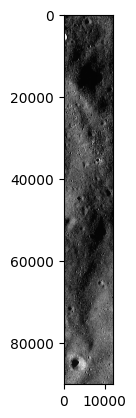

In [60]:
plt.imshow(image,cmap='gray')

In [5]:
patches = patchify.patchify(image,(100,100),step=100) 

In [6]:
patches.shape

(901, 120, 100, 100)

In [7]:
patches[0][0]

array([[42, 46, 55, ..., 12, 12, 12],
       [45, 48, 54, ..., 12, 12, 13],
       [49, 50, 49, ..., 12, 12, 12],
       ...,
       [63, 68, 79, ..., 84, 83, 83],
       [62, 73, 81, ..., 86, 82, 82],
       [69, 76, 85, ..., 85, 84, 83]], dtype=uint8)

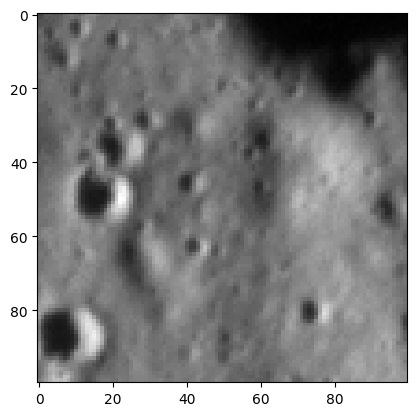

In [8]:
plt.imshow(patches[0][0],cmap='gray')

In [9]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 100, 100, 1  0           []                               
                                )]                                                                
                                                                                                  
 conv_block (Conv_block)        (None, 100, 100, 64  74496       ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 dwt_downsampling (DWT_downsamp  (None, 50, 50, 256)  0          ['conv_block[0][0]']             
 ling)                                                                                        

In [50]:
results = []

In [51]:
for i in tqdm(range(120)):
    row = []
    for j in range(patches.shape[1]):

        img = patches[i][j].reshape(1,100,100,1)
        rel = model.predict(img)
        clear_output(wait=True)
        sys.stdout.flush()
        rel = rel.reshape(100,100)
        row.append(rel)
    
    results.append(row)    
        

100%|██████████████████████████████████████████████████████████████████████████████| 120/120 [1:41:30<00:00, 50.75s/it]


In [52]:
results = np.array(results)

In [54]:
np.save('MWCNN_result.npy',results)

In [53]:
results.shape

(120, 120, 100, 100)

Text(0.5, 1.0, 'MWCNN_result')

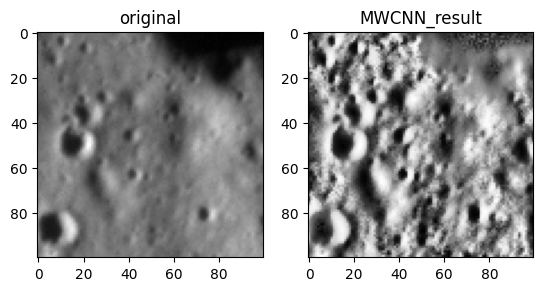

In [55]:
plt.subplot(1, 2, 1)
plt.imshow(patches[0][0],cmap='gray')
plt.title('original')
plt.subplot(1, 2, 2)
plt.imshow(results[0][0],cmap='gray')
plt.title('MWCNN_result')

In [56]:
re_tsrip = patchify.unpatchify(results,(12000,12000))

In [57]:
re_tsrip.shape

(12000, 12000)

Text(0.5, 1.0, 'MWCNN_result')

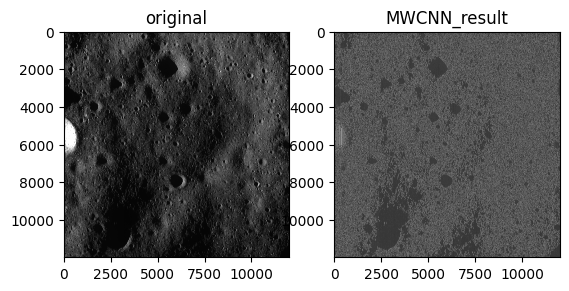

In [61]:
plt.subplot(1, 2, 1)
plt.imshow(image[:12000,:],cmap='gray')
plt.title('original')
plt.subplot(1, 2, 2)
plt.imshow(re_tsrip,cmap='gray')
plt.title('MWCNN_result')

In [86]:
x = image[:12000,:] + re_tsrip

Text(0.5, 1.0, 'addition of original and MWCNN image')

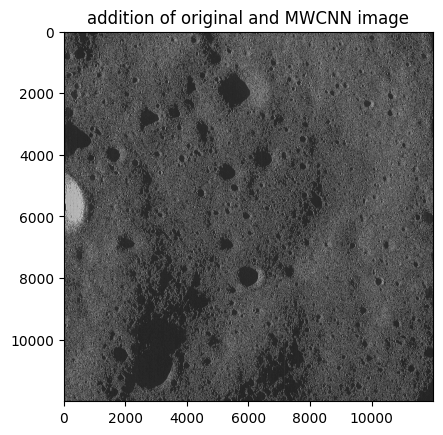

In [87]:
plt.imshow(x,cmap='gray')
plt.title('addition of original and MWCNN image')

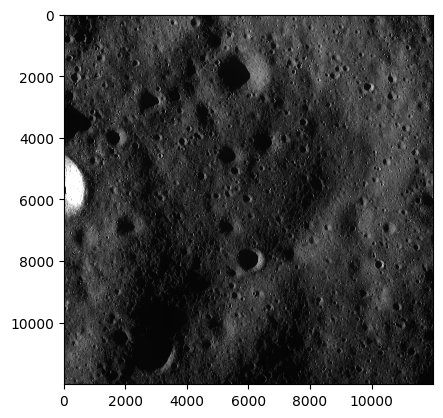

In [79]:
plt.imshow(image[:12000,:],cmap='gray')